## Day 2

# Part 1

In [2]:
commands = []
with open("commands.txt", "r") as f:
    for line in f.readlines():
        commands.append((line.split()[0], int(line.split()[1])))
        
# print(commands)

In [3]:
position = [0, 0]  # horizontal, depth

for command in commands:
    if command[0] == "forward":
        position[0] += command[1]
    elif command[0] == "down":
        position[1] += command[1]
    else:
        position[1] -= command[1]
        
print(position)
print("answer: ", position[0] * position[1])

[2085, 785]
answer:  1636725


# Part 2

In [4]:
position = [0, 0]  # horizontal, depth
aim = 0

for command in commands:
    if command[0] == "forward":
        position[0] += command[1]
        position[1] += (aim * command[1])
    elif command[0] == "down":
        aim += command[1]
    else:
        aim -= command[1]
        
print(position)
print("answer: ", position[0] * position[1])

[2085, 898205]
answer:  1872757425


## Visualisation

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.animation import FuncAnimation

In [17]:
position1 = [0, 0]  # horizontal, depth
horizontal1 = [0]
depth1 = [0]

position2 = [0, 0]  # horizontal, depth
aim = 0
horizontal2 = [0]
depth2 = [0]
aim2 = [0]


# P1
for command in commands:
    if command[0] == "forward":
        position1[0] += command[1]
    elif command[0] == "down":
        position1[1] += command[1]
    else:
        position1[1] -= command[1]
        
    horizontal1.append(position1[0])
    depth1.append(-position1[1])
        
# P2
for command in commands:
    if command[0] == "forward":
        position2[0] += command[1]
        position2[1] += (aim * command[1])
    elif command[0] == "down":
        aim += command[1]
    else:
        aim -= command[1]
    
    horizontal2.append(position2[0])
    depth2.append(-position2[1])
    aim2.append(-aim)
        
print(position1, position2)
# print("answer: ", position[0] * position[1])

[2085, 785] [2085, 898205]


(-104.25, 2189.25)
(-841.05, 40.050000000000004)


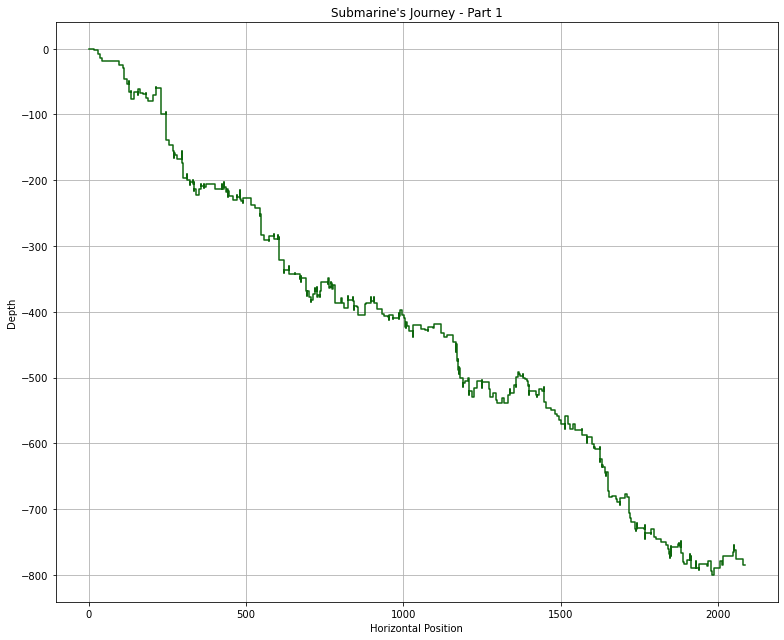

In [9]:
# Visualisation?

palette = sns.color_palette("coolwarm", len(horizontal1))

fig, ax = plt.subplots(figsize=(11,9))

ax.set_xlabel("Horizontal Position")
ax.set_ylabel("Depth")
ax.set_title("Submarine's Journey - Part 1")

ax.plot(horizontal1, depth1, color=(0.05, 0.4, 0.05))

print(ax.get_xlim())
print(ax.get_ylim())

ax.grid()
fig.tight_layout()
fig.savefig("submarine_plot1.png", dpi=300, transparent=False, facecolor="white")

(-104.25, 2189.25)
(-943115.25, 44910.25)


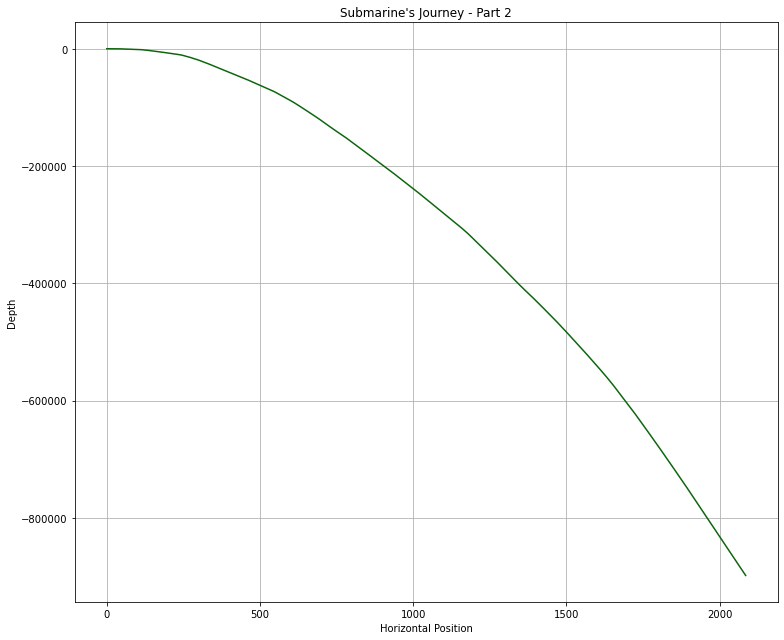

In [15]:
palette = sns.color_palette("coolwarm", len(horizontal2))

fig, ax = plt.subplots(figsize=(11,9))

ax.set_xlabel("Horizontal Position")
ax.set_ylabel("Depth")
ax.set_title("Submarine's Journey - Part 2")

ax.plot(horizontal2, depth2, color=(0.05, 0.4, 0.05))

print(ax.get_xlim())
print(ax.get_ylim())

ax.grid()
fig.tight_layout()
fig.savefig("submarine_plot2.png", dpi=300, transparent=False, facecolor="white")

# Animation

Starting to animate!


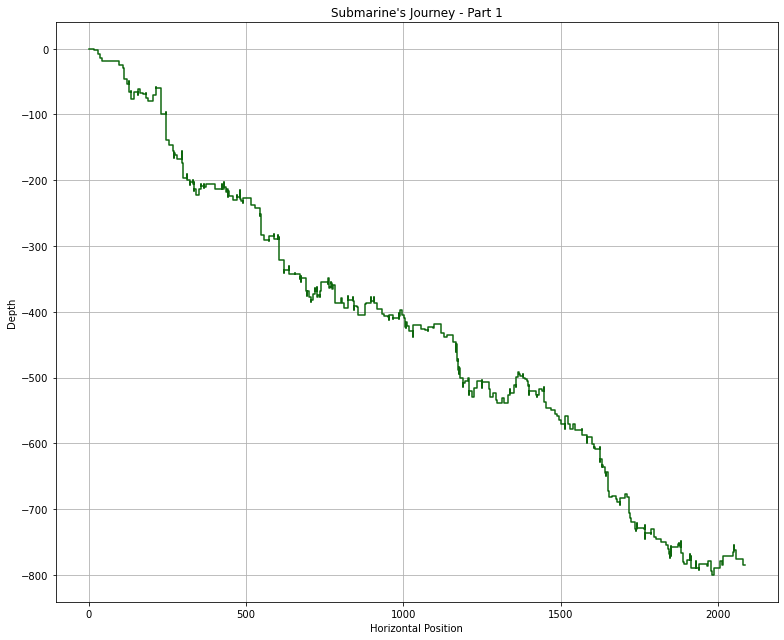

In [14]:
fig, ax = plt.subplots(figsize=(11,9))
line, = ax.plot([], [], color=(0.05, 0.4, 0.05))
# line2, = ax.plot([], [], 'k--', linewidth=3)

ax.set_xlabel("Horizontal Position")
ax.set_ylabel("Depth")
ax.set_title("Submarine's Journey - Part 1")

# Limits found by inspecting above graphs
ax.set_xlim((-104.25, 2189.25))
ax.set_ylim((-841.05, 40.050000000000004))
ax.grid()
fig.tight_layout()

def animate(i): 
    # appending new points to x, y axes points list 
    if i <= len(horizontal1):
        line.set_data(horizontal1[:i], depth1[:i])
        
    return line,

print("Starting to animate!")
# call the animator
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=len(horizontal1)+50, interval=10, blit=True) 

# save the animation as mp4 video file 
anim.save("submarine_trip_1.mp4")

Starting to animate!


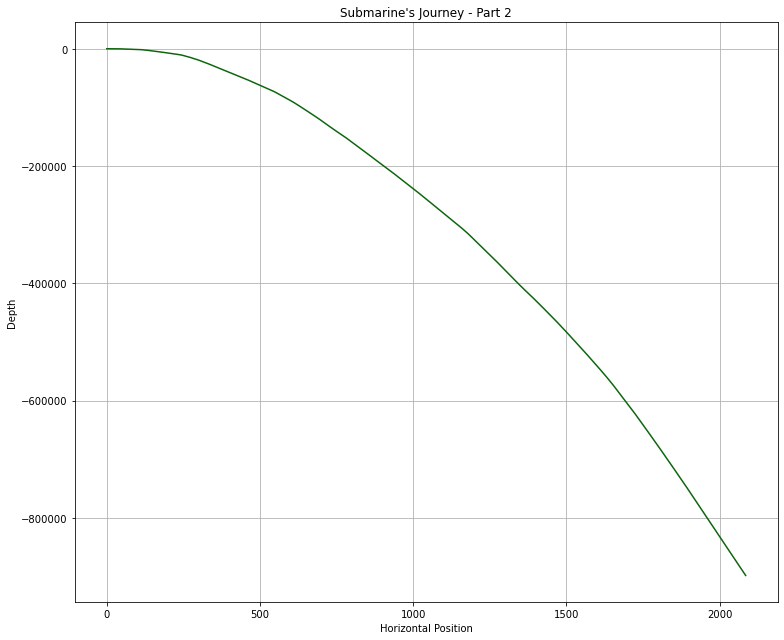

In [16]:
fig, ax = plt.subplots(figsize=(11,9))
line, = ax.plot([], [], color=(0.05, 0.4, 0.05))
# line2, = ax.plot([], [], 'k--', linewidth=3)

ax.set_xlabel("Horizontal Position")
ax.set_ylabel("Depth")
ax.set_title("Submarine's Journey - Part 2")

# Limits found by inspecting above graphs
ax.set_xlim((-104.25, 2189.25))
ax.set_ylim((-943115.25, 44910.25))
ax.grid()
fig.tight_layout()

def animate(i): 
    # appending new points to x, y axes points list 
    if i <= len(horizontal2):
        line.set_data(horizontal2[:i], depth2[:i])
        
    return line,

print("Starting to animate!")
# call the animator
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=len(horizontal2)+50, interval=10, blit=True) 

# save the animation as mp4 video file 
anim.save("submarine_trip_2.mp4")

In [128]:
def draw_submarine(body_centre, scale):
    sub_colour = (0.2, 0.2, 0.2)
    # go from centre of rectangle
    # body_centre = [650, -175]
    body_width = 300 * scale
    body_height = 150 * scale
    body_top_left = [body_centre[0] - body_width / 2, body_centre[1] + body_height / 2]
    body = matplotlib.patches.Rectangle(body_top_left, body_width, -body_height, color=sub_colour)

    # now for the front
    # starts at centre of rectangle vertically, rightmost point
    front_centre = [body_centre[0] + body_width / 2, body_centre[1]]
    front_height = body_height
    front_width = body_width
    front = matplotlib.patches.Ellipse(front_centre, front_width, front_height, color=sub_colour)

    # now for the back
    back_centre = body_centre
    back_theta1 = 150
    back_theta2 = 210
    back_radius = body_width * 2/3
    back = matplotlib.patches.Wedge(back_centre, back_radius, back_theta1, back_theta2, color=sub_colour)

    # and now the periscope
    peri_bot_left = [body_centre[0] + body_width * 1/4, body_centre[1] + body_height / 2]
    peri_width = body_width * 1/5
    peri_height = body_height * 1/3
    periscope = matplotlib.patches.Rectangle(peri_bot_left, peri_width, peri_height, color=sub_colour)
    
    # add a window too because it's cute :)
    window_centre = [body_centre[0] + body_width * 3/5, body_centre[1] + body_height * 1/5]
    window_height = body_height * 1/5
    window_width = body_width * 1/5
    window = matplotlib.patches.Ellipse(window_centre, window_width, window_height, color="azure")

    return [body, front, back, periscope, window]

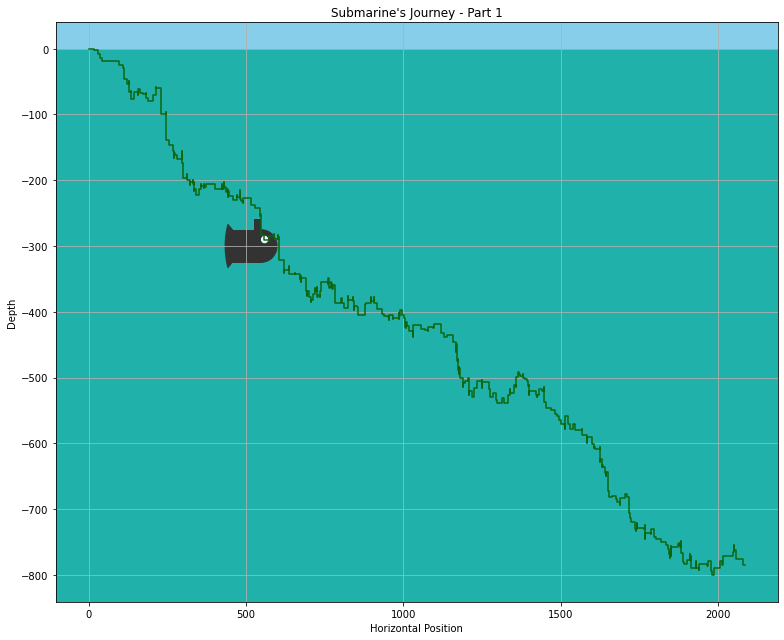

In [126]:
palette = sns.color_palette("coolwarm", len(horizontal1))

fig, ax = plt.subplots(figsize=(11,9))

# first do the background :O
# sea

ax.set_xlabel("Horizontal Position")
ax.set_ylabel("Depth")
ax.set_title("Submarine's Journey - Part 1")

ax.plot(horizontal1, depth1, color=(0.05, 0.4, 0.05))
xlims = ax.get_xlim()
ylims = ax.get_ylim()

# sea
ax.axhspan(-9*(10**10), 0, color="lightseagreen", zorder=0)
# sky
ax.axhspan(0, 9*(10**10), color="skyblue", zorder=-1)

ax.set_xlim(xlims)
ax.set_ylim(ylims)

scale = 0.33
body_centre = [500, -300]

patches = draw_submarine(body_centre, scale)
ax.add_collection(matplotlib.collections.PatchCollection(patches, match_original=True))

ax.grid()
fig.tight_layout()
fig.savefig("submarine_plot1.png", dpi=300, transparent=False, facecolor="white")

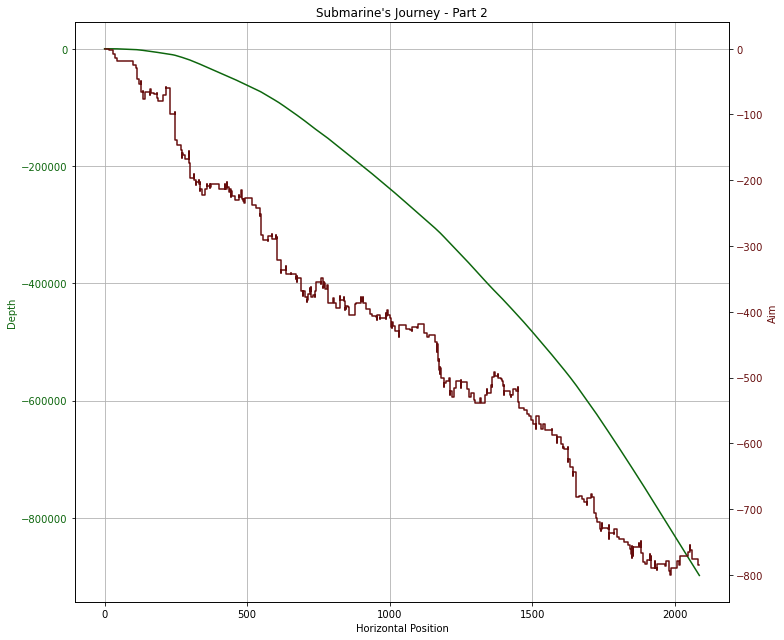

In [91]:
palette = sns.color_palette("coolwarm", len(horizontal1))

fig, ax = plt.subplots(figsize=(11,9))

ax.set_xlabel("Horizontal Position")
ax.set_ylabel("Depth", color=(0.05, 0.4, 0.05))
ax.set_title("Submarine's Journey - Part 2")

ax.plot(horizontal2, depth2, color=(0.05, 0.4, 0.05))
ax.tick_params(axis='y', labelcolor=(0.05, 0.4, 0.05))

ax2 = ax.twinx()
ax2.set_ylabel("Aim", color=(0.4, 0.05, 0.05))
ax2.plot(horizontal2, aim2, color=(0.4, 0.05, 0.05))
ax2.tick_params(axis='y', labelcolor=(0.4, 0.05, 0.05))

ax.grid()
fig.tight_layout()
fig.savefig("submarine_plot1.png", dpi=300, transparent=False, facecolor="white")

Starting to animate!


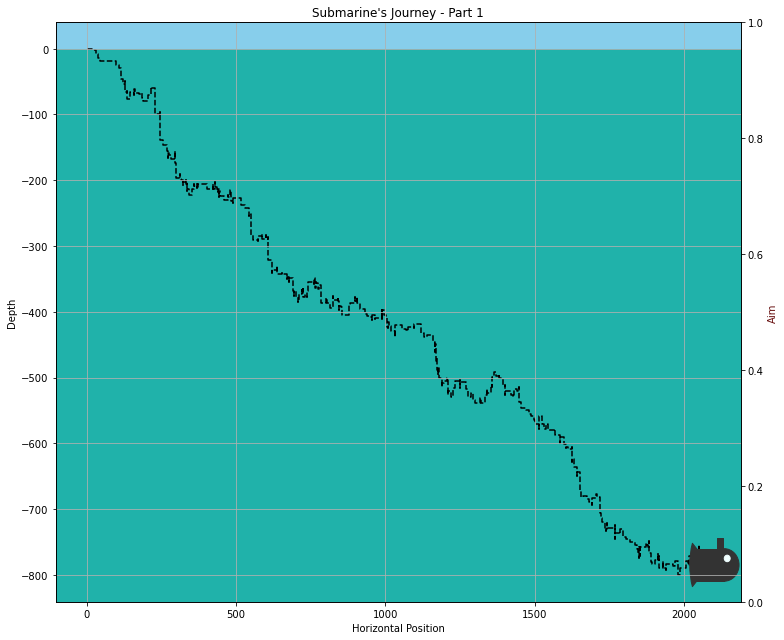

In [135]:
fig, ax = plt.subplots(figsize=(11,9))
ax2 = ax.twinx()
ax2.set_ylabel("Aim", color=(0.4, 0.05, 0.05))
# ax2.plot(horizontal2, aim2, color=(0.4, 0.05, 0.05))
# ax2.tick_params(axis='y', labelcolor=(0.4, 0.05, 0.05))
line, = ax.plot([], [], color="black", zorder=0.5, linestyle="--")
# line2, = ax2.plot([], [], color="red", zorder=0.4)
# line2, = ax.plot([], [], 'k--', linewidth=3)

ax.set_xlabel("Horizontal Position")
ax.set_ylabel("Depth")
ax.set_title("Submarine's Journey - Part 1")

# sea
ax.axhspan(-9*(10**10), 0, color="lightseagreen", zorder=0)
# sky
ax.axhspan(0, 9*(10**10), color="skyblue", zorder=-1)

scale = 0.33

patches = draw_submarine([horizontal1[0], depth1[0]], scale)
submarine = matplotlib.collections.PatchCollection(patches, match_original=True)
ax.add_collection(submarine)

# Limits found by inspecting above graphs
ax.set_xlim((-104.25, 2189.25))
ax.set_ylim((-841.05, 40.050000000000004))
ax.grid()
fig.tight_layout()

def animate(i): 
    # appending new points to x, y axes points list 
    if i <= len(horizontal1)-1:
        line.set_data(horizontal1[:i+1], depth1[:i+1])
        new_patches = draw_submarine([horizontal1[i], depth1[i]], scale)
        submarine.set_paths(new_patches)
        
    return line,

print("Starting to animate!")
# call the animator
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=(len(horizontal1)+50), interval=10, blit=True) 

# save the animation as mp4 video file 
anim.save("submarine_trip_1.mp4")